In [1]:
!pip install scipy
!pip install networkx

   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   -- ------------------------------------- 2.6/40.9 MB 12.6 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/40.9 MB 13.4 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/40.9 MB 15.5 MB/s eta 0:00:03
   ------------- -------------------------- 13.9/40.9 MB 16.5 MB/s eta 0:00:02
   ----------------- ---------------------- 17.6/40.9 MB 17.0 MB/s eta 0:00:02
   --------------------- ------------------ 21.5/40.9 MB 17.4 MB/s eta 0:00:02
   ------------------------ --------------- 25.4/40.9 MB 17.5 MB/s eta 0:00:01
   ---------------------------- ----------- 29.4/40.9 MB 17.7 MB/s eta 0:00:01
   -------------------------------- ------- 33.6/40.9 MB 18.1 MB/s eta 0:00:01
   ------------------------------------ --- 37.7/40.9 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------  40.9/40.9 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 17.8 MB

# Redes complejas: Representación y principales características

![Martin Grandjean, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Social_Network_Analysis_Visualization.png/640px-Social_Network_Analysis_Visualization.png)

*Computación Social y Personalización*

*Grado en Ciencia de Datos e Inteligencia Artificial*

**Sergio D'Antonio Maceiras**

[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

Dependencias necesarias para ejecutar esta libreta:

- `networkx @ 2.7.1`
- `seaborn @ 0.11.2`
- `matplotlib @ 3.5.1`

# Representación de redes

Todo el análisis y modelado de redes se basa en especificar primero lo que podemos representar y cómo lo representamos matemática o computacionalmente. Si hablamos de redes (grafos), nos basaremos principalmente en tres representaciones distintas:

- Matriz de adyacencia
- Lista de adyacencia
- Conjunto de aristas

## Matriz de adyacencia

Una matriz de adyacencia $A$ es una matriz $n\times n$ que se define como:

$$
A_{ij} = \left\{\begin{array}{cl}
w_{ij} & \textrm{si los nodos } i\ \textrm{y } j\ \textrm{están conectados} \\ 0 & \textrm{en otro caso}
\end{array}\right.
$$

donde $n=|V|$ es el número de nodos, y $w_{ij} \in \mathbb{R}$ es el *peso* de la conexión entre los nodos $i$ y $j$. Si estamos representando una **red no ponderada** entonces las aristas tendrán el peso unitario $w_{ij}=1$.

Por ejemplo, la matriz de adyacencia para la siguiente red no dirigida

![Grafo no dirigido](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/333px-6n-graf.svg.png)

sería

$$
A = \begin{bmatrix}
 0 & 1 & 0 & 0 & 1 & 0 \\
 1 & 0 & 1 & 0 & 1 & 0 \\
 0 & 1 & 0 & 1 & 0 & 0 \\
 0 & 0 & 1 & 0 & 1 & 1 \\
 1 & 1 & 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

Obviamente, al ser una red **no dirigida** la matriz $A$ es simétrica. Además, al no existir aristas autoreferenciales la diagonal es cero $A_{ii}=0, i\in V$.

A veces, las **matrices de adyacencia** se utilizan en los algoritmos de redes, porque una operación en la matriz $A$ es más eficiente (lleva menos tiempo) que la misma operación en otra representación. Por ejemplo, determinar si existe alguna arista, $(i, j) \in E$, es más rápido si usamos una **matriz de adyacencia** porque sólo requiere una búsqueda con complejidad de tiempo constante $O(1)$. Sin embargo, $A$ requiere una cantidad cuadrática $\Theta(n^2)$ de memoria para su almacenamiento, ya que almacena explícitamente un valor para cada par de nodos $i, j \in V$.

Por norma general, las redes complejas del mundo real suelen ser **dispersas**, es decir, la mayoría de los elementos de su matriz de adyacencia son $0$, lo que supone un gasto innecesario de memoria con este tipo de representación.

Vamos a crear un par de redes aleatorias con la librería [NetworkX](https://networkx.org/) para acceder a la representación en forma de **matriz de adyacencia**:

In [1]:
import scipy
import scipy.sparse
import networkx as nx

no_dirigida = nx.erdos_renyi_graph(10, 0.4, seed=1337, directed=False)
dirigida = nx.erdos_renyi_graph(10, 0.4, seed=42, directed=True)

En el caso de la red no dirigida:

[[0 0 0 1 0 1 0 1 0 0]
 [0 0 1 0 1 0 0 1 0 1]
 [0 1 0 1 0 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [1 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0]]


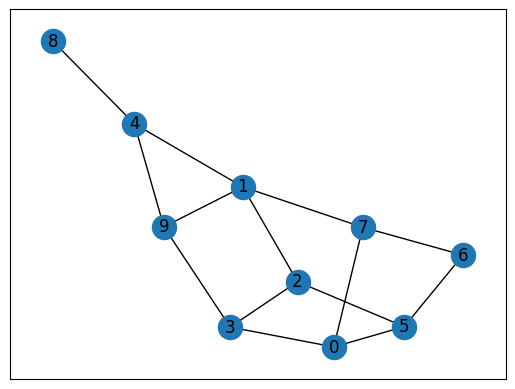

In [2]:
nx.draw_networkx(no_dirigida)
print(nx.adjacency_matrix(no_dirigida).todense())

Y para la red dirigida:

[[0 0 1 1 1 0 0 0 1 0]
 [1 0 1 0 1 1 0 0 1 0]
 [0 1 0 0 0 1 1 0 1 1]
 [1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 1]
 [1 1 1 0 1 0 1 1 1 0]
 [0 0 1 0 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 0 1 0]
 [0 1 0 1 0 0 1 1 0 0]
 [1 0 0 1 1 0 0 1 1 0]]


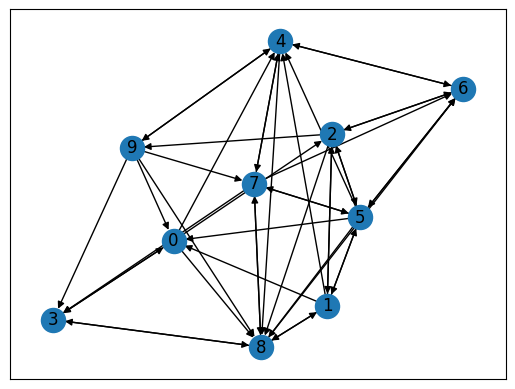

In [ ]:
nx.draw_networkx(dirigida)
print(nx.adjacency_matrix(dirigida).todense())

## Lista de adyacencia

Una optimización con respecto al consumo de memoria de las matrices de adyacencia son las **listas de adyacencia**, puesto que solo almacenan aquellas posiciones $A_{ij}\neq0, i,j \in V$. Opcionalmente, las anotaciones de aristas $w_{ij}$ pueden almacenarse junto con el nombre del vecino $j$ en una tupla, por ejemplo, $(j, w_{ij})$. Por lo tanto, una lista de adyacencia es similar a una tabla *hash* de adyacencias.

Para el grafo de ejemplo de la matriz de adyacencia $A$ anterior, la lista de adyacencias sería la siguiente:

$$
\begin{align*}
    [1] &\rightarrow (2, 5)\\
    [2] &\rightarrow (1, 3, 5)\\
    [3] &\rightarrow (2, 4)\\
    [4] &\rightarrow (3, 5, 6)\\
    [5] &\rightarrow (1, 2, 4)\\
    [6] &\rightarrow (4)
\end{align*}
$$

También podemos obtener la lista de adyacencia en forma de diccionario con **NetworkX** para la red aleatoria no dirigida anterior:

In [ ]:
dict(no_dirigida.adjacency())

{0: {3: {}, 5: {}, 7: {}},
 1: {2: {}, 4: {}, 7: {}, 9: {}},
 2: {1: {}, 3: {}, 5: {}},
 3: {0: {}, 2: {}, 9: {}},
 4: {1: {}, 8: {}, 9: {}},
 5: {0: {}, 2: {}, 6: {}},
 6: {5: {}, 7: {}},
 7: {0: {}, 1: {}, 6: {}},
 8: {4: {}},
 9: {1: {}, 3: {}, 4: {}}}

Podemos observar que, al no tener pesos en la red, los vecinos no tienen ninguna información asociada `{}`.

## Lista de aristas

La tercera opción de representación de redes es la **lista de aristas**. Como su propio nombre indica, almacena sólo las aristas en sí: $(i,j)$ para las aristas no ponderadas y $(i,j,w_{ij})$ para las aristas ponderadas, sin enumerar directamente los nodos. Los índices de los nodos, la presencia de nodos sin aristas, y si el grafo es dirigido, ponderado, bipartito, etc. deben inferirse del contenido de la lista de aristas.

Para el ejemplo simple de la matriz de adyacencia $A$ la lista de aristas sería:

$$
A = \left\{(1,2), (1,5), (2,3), (2,5), (3,4), (4,5), (4,6) \right\}
$$

En una red simple, una arista puede aparecer sólo como $(i,j)$, lo que implica tanto que no está ponderada como que su arista recíproca $(j, i)$ también existe. En un grafo no simple, las aristas pueden ser dirigidas, por lo que ver $(i,j)$ no debería implicar que $(j,i)$ también exista. Esto presenta una ambigüedad que no puede resolverse sin un conocimiento externo sobre si la lista de aristas representa una red dirigida o no dirigida. Además, como sólo se enumeran las aristas, los nodos sin aristas no se enumeran, lo que puede causar ambigüedades adicionales. Esta ambigüedad hace que este formato de representación sea poco recomendable.

Podemos acceder a la lista de aristas de una red de **NetworkX** accediendo a su propiedad `edges`:

In [ ]:
no_dirigida.edges

EdgeView([(0, 3), (0, 5), (0, 7), (1, 2), (1, 4), (1, 7), (1, 9), (2, 3), (2, 5), (3, 9), (4, 8), (4, 9), (5, 6), (6, 7)])

O en el caso de la red dirigida:

In [ ]:
dirigida.edges

OutEdgeView([(0, 2), (0, 3), (0, 4), (0, 8), (1, 0), (1, 2), (1, 4), (1, 5), (1, 8), (2, 1), (2, 5), (2, 6), (2, 8), (2, 9), (3, 0), (3, 8), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 4), (5, 6), (5, 7), (5, 8), (6, 2), (6, 4), (6, 5), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (8, 1), (8, 3), (8, 6), (8, 7), (9, 0), (9, 3), (9, 4), (9, 7), (9, 8)])

# Estadísticas descriptivas de las redes

El objetivo de modelar la realidad en forma de redes complejas no es otro que entender y describir los fenómenos del mundo real de forma cuantitativa y cualitativa. Dicho de otra forma, **extraer conocimiento útil** mediante el análisis de las redes complejas.

Un conjunto de herramientas que nos sirve para alcanzar nuestro objetivo son las estadísticas descriptivas de una red, las cuales se pueden agrupar en:

- Medidas de **conectividad** de la red, que están directa o indirectamente relacionadas con el número de conexiones que tiene un nodo, así como con la estructura global de conexiones de la red.
- Medidas de **_motif_**, que cuentan la frecuencia de subgrafos específicos en una red; o dicho de otra forma, patrones de interconexión que se producen en las redes complejas en números significativamente superiores a los de las redes aleatorias ([fuente](https://www.science.org/doi/10.1126/science.298.5594.824)).
- Medidas de **posición**, relacionadas con el lugar que ocupan los nodos dentro de la red, así como la distancia entre ellos.

Además, en función de su ámbito podemos distinguir entre las medidas a **nivel de nodo**, o **locales**, y las medidas a **nivel de red**, o **globales**.

## Zachary's Karate Club

Para aplicar las estadísticas descriptivas que vamos a ver a continuación usaremos una red social muy conocida por aquellos que se adentran en el campo del análisis de redes complejas: el [club de karate de Zachary](https://www.journals.uchicago.edu/doi/10.1086/jar.33.4.3629752). Un resumen del origen y contenido de esta red:

> These are data collected from the members of a university karate club by Wayne Zachary in 1977. The ZACHE matrix represents the presence or absence of ties among the members of the club. The ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred). Here's how the Zach C matrix was constructed. A finite set of possible contexts, chosen on the basis of observation of the group, will be used as the domain of a scale variable. Then, the relationship between each pair of individuals in the network is examined against this (nominal) scale. A value, equal to the total number of contexts from the scale in which the two individuals interacted, is then assigned to the corresponding entry in C. Eight contexts are included in the domain of the scale applied to the edges in the karate club network. They are: (1) Association in and between academic classes at the university. (2) Membership in Mr. Hi's private karate studio on the east side of the city where Mr. Hi taught nights as a part-time instructor. (3) Membership in Mr. Hi's private karate studio on the east side of the city, where many of his supporters worked out on weekends. (4) Student teaching at the east-side karate studio referred to in (2). This is different from (2) in that student teachers interacted with each other, but were prohibited from interacting with their sutdents. (5) Interaction at the university rathskeller, located in the same basement as the karate club's workout area. (6) Interaction at a student-oriented bar located across the street from the university campus. (7) Attendance at open karate tournaments held through the area at private karate studios. (8) Attendance at intercollegiate karate tournaments held at local universities. Since both open and intercollegiate tournaments were held on Saturdays, attendance at both was impossible. This scale was applied to the relationships between all pairs of individuals in the karate club, using data compiled over the three years of direct observation of interactions in the club. For each existing edge in E (Figure 2), the pair of individuals involved interacted in at least one of the above eight contexts. The quantified matrix of contexts is given in Figure 3, and is the third component in the capacitated network model (V,E,C).

Esta red social está incluida en la librería **NetworkX**, podemos cargarla con [`karate_club_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html):

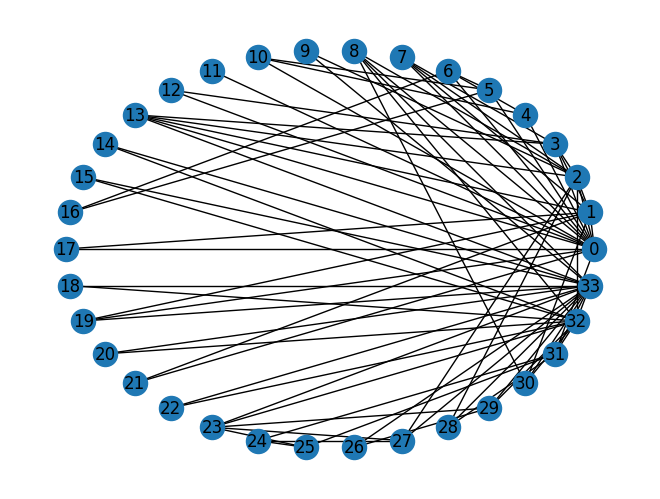

In [3]:
karate = nx.karate_club_graph()

nx.draw_circular(karate, with_labels=True)

## Grado del nodo

La más básica de las estadísticas de red es el **grado** de un nodo, que cuenta el número de conexiones que tiene en la red. La estructura de grados de una red a menudo es suficiente para detectar muchos otros patrones estadísticos en la estructura de la red.

En una red no dirigida, una arista $(i, j)$ contribuye al grado de ambos nodos. Por lo tanto, si su matriz de adyacencia es $A$, el grado $k_i$ de un nodo $i$ se define como:

$$
k_i = \sum_{j=1}^n A_{ij} = \sum_{j=1}^n A_{ji}
$$

Como una misma arista contribuye a dos nodos, la suma de todos los grados de la red será el doble del número de aristas $m$. Podemos derivar la siguiente expresión para el **grado medio de la red $\left< k\right>$**:

$$
\left< k\right> = \frac{1}{n} \sum_{i=1}^n k_i = \frac{2m}{n}
$$

Podemos dividir el número de aristas $m$ entre el total de aristas posibles que puede haber en un grafo $\binom{n}{2}$ para obtener la **densidad** $\rho$ de la red:

$$
\rho = \frac{m}{\binom{n}{2}} = \frac{2m}{n(n-1)} = \frac{\left< k\right>}{n-1} \simeq \frac{\left< k\right>}{n}
$$

En el caso de que la red sea **dirigida** es necesario distinguir grado de entrada (*in-degree*) y grado de salida (*out-degree*), en función de las aristas que entran y salen de cada nodo. Suponiendo que la red está definida por la matriz de adyacencia $A$, se define:

$$
\begin{aligned}
    k_i^{\textrm{out}} &= \sum_{j=1}^n A_{ij}\\
    k_i^{\textrm{in}} &= \sum_{j=1}^n A_{ji}
\end{aligned}
$$

Con respecto al grado promedio también distinguiremos si es de entrada o de salida. Ya que toda arista de salida es una arista de entrada para otro nodo, los grados medios de entrada y salida de una red coinciden:

$$
\left<k^\textrm{out}\right> = \frac{1}{n} \sum_{i=1}^n k_i^\textrm{out}
$$

Vamos a calcular el grado de cada nodo y el grado medio de la red del club de karate:

In [4]:
print("Grado de cada nodo de la red:")
for v in karate:
    print(f"{v:4} {karate.degree(v):6}")

print("\n\n")
print(f"Grado medio de la red: {2*karate.number_of_edges() / float(karate.number_of_nodes()):.4f}")

Grado de cada nodo de la red:
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17



Grado medio de la red: 4.5882


## Distribución de grados

Una vez que sabemos calcular el grado de cada nodo de la red podemos realizar un análisis a nivel global (para toda la red) del comportamiento de esta métrica. Esto se conoce como la **distribución de grados** $Pr(k)$ que se corresponde con la probabilidad de que un nodo seleccionado de manera aleatoria tendrá $k$ vecinos, o dicho de otro modo, tendrá un grado $k$.

Podemos visualizar esta distribución con un gráfico de barras que represente el grado $k$ en el eje X y el número de nodos con grado $k$ en el eje Y:

<Axes: ylabel='count'>

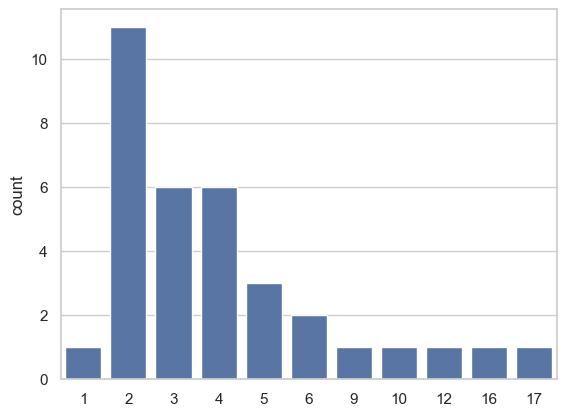

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

grados = [d for n, d in karate.degree()]
sns.countplot(x=grados)

Podemos observar que la distribución de grados del club de karate está sesgada a la izquierda. En lugar de representar la distribución como una gráfica de barras se suele utilizar una gráfica de puntos empleando escala logarítmica en ambos ejes para comprimir visualmente la varianza de ambas variables:

<Axes: >

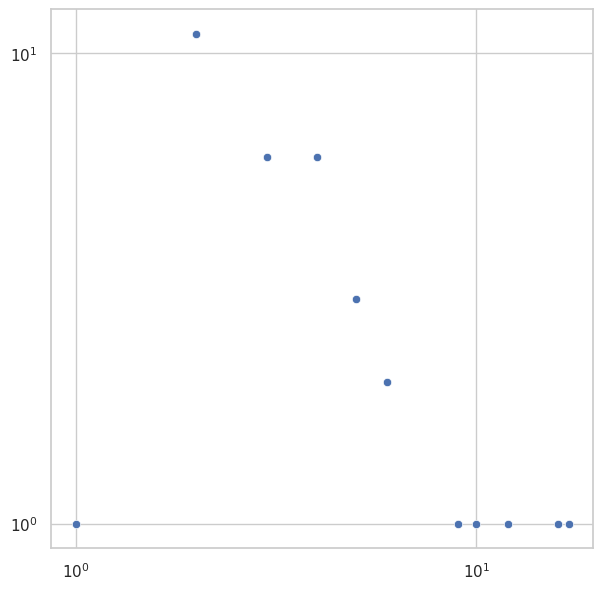

In [ ]:
grados_ord = sorted(set(grados))
conteo = [grados.count(g) for g in grados_ord]

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x=grados_ord, y=conteo, ax=ax)

## Betweenness


- Se calcula como el número de caminos mínimos que pasan por un nodo
- Un nodo con betweenness alto indica que es importante porque hace de pegamento en la red

$$
Bt(E) = \sum_{i \in U, j \in U, i \neq j} \frac{|\sigma_{ij}(E)|}{|\sigma_{ij}|}
$$

In [8]:
betweness = nx.betweenness_centrality(karate)

print("Betweeness centrality:")
for v in karate:
    print(f"{v:4} {betweness[v]:.4f}")


Betweeness centrality:
   0 0.4376
   1 0.0539
   2 0.1437
   3 0.0119
   4 0.0006
   5 0.0300
   6 0.0300
   7 0.0000
   8 0.0559
   9 0.0008
  10 0.0006
  11 0.0000
  12 0.0000
  13 0.0459
  14 0.0000
  15 0.0000
  16 0.0000
  17 0.0000
  18 0.0000
  19 0.0325
  20 0.0000
  21 0.0000
  22 0.0000
  23 0.0176
  24 0.0022
  25 0.0038
  26 0.0000
  27 0.0223
  28 0.0018
  29 0.0029
  30 0.0144
  31 0.1383
  32 0.1452
  33 0.3041


## Motifs

Como se ha definido previamente, un **motif** es un subgrafo con unas determinades propiedades que se repite en forma de patrón a lo largo de una red. Normalmente querremos contar cuántos **motifs** de un tipo concreto podemos encontrar en una red, para razonar sobre ella. Cabe esperar que, dependiendo del número de nodos que implique el **motif** a contar, el proceso será muy costoso computacionalmente. A continuación vamos a analizar algunos **pequeños motifs** interesantes que se traducen en propiedades interesantes de las redes.

### Coeficiente de clustering

En una red no dirigida, el **motif** más pequeño es un triángulo. El **coeficiente de clustering global** (también conocido como **transitividad**) se basa en tripletes de nodos. Un triplete son tres nodos que están conectados por dos (triplete abierto) o tres (triplete cerrado) aristas no dirigidas. Por lo tanto, un triángulo incluye tres tripletes cerrados, uno centrado en cada uno de los nodos. El **coeficiente de clustering global** es el número de tripletes cerrados dividido por el número total de tripletes (tanto abiertos como cerrados):

$$
C = \frac{3\times\textrm{número de triángulos}}{\textrm{número total de tripletes}} = \frac{\sum_{i=1}^n \sum_{j=1}^n \sum_{k=1}^n A_{ij}A_{jk}A_{ki}}{\sum_{i=1}^n \sum_{j=1}^n \sum_{k\neq i}^n A_{ij}A_{jk}}
$$

Esta métrica tiene una variante a nivel de nodo: el **coeficiente de clustering local** de un nodo cuantifica lo cerca que están sus vecinos de ser una pandilla (*clique*). Viene dado por una proporción del número de enlaces entre los nodos de su vecindad dividido por el número de enlaces que podrían existir entre ellos:

$$
C_i = \frac{\textrm{número de pares de vecinos de }i\textrm{ que están conectados}}{\textrm{número total de posibles pares vecinos de }i} = \frac{\sum_{j<k}A_{ij}A_{jk}A_{ki}}{\binom{k_i}{2}}
$$

Calculamos el coeficiente de clustering local de los nodos de la red social del club de karate:

In [ ]:
nx.clustering(karate)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

Y su **transitividad** o **coeficiente de clustering global**:

In [ ]:
nx.transitivity(karate)

0.2556818181818182

### Reciprocidad

En el caso de las **redes dirigidas** existe un **motif** simple interesante que consiste en un ciclo de tamaño 2, es decir, dos nodos $i, j$ relacionados por dos aristas $(i, j), (j, i)$. La **reciprocidad de una red** $r$ viene dada por la fracción de aristas que son recíprocas. Para calcular $r$, simplemente contamos el número de ciclos de tamaño 2 y lo dividimos por el número total de aristas:

$$
r = \frac{1}{m} \sum_{i,j} A_{ij}A_{ji}
$$

También podemos cuantificar la reciprocidad que experimenta un nodo individual, que es una medida a nivel de nodo llamada **reciprocidad local**. En lugar de sumar toda la red, en este caso contamos el número de ciclos de tamaño 2 unidos al nodo $i$, y lo dividimos por su grado de salida:

$$
r_i = \frac{1}{k_i^{\textrm{out}}}\sum_j A_{ij}A_{ji}
$$

Esta métrica es interesante por varias razones. En primer lugar, en las redes que transportan información o material (como las redes de correo electrónico, la web o la Wikipedia) los enlaces mutuos facilitan el proceso de transporte. En segundo lugar, cuando se analizan redes dirigidas, la gente suele tratarlas como no dirigidas por simplicidad; por lo tanto, estudiar la reciprocidad ayuda a estimar el error introducido cuando se trata una red dirigida como no dirigida. Por último, la detección de patrones de reciprocidad no triviales puede revelar posibles mecanismos y principios organizativos que dan forma a la topología de la red observada.

## Caminos geodésicos y posición

Un **camino geodésico** es el más corto de todos los caminos posibles entre dos nodos. Estos caminos sirven de base para una serie de medidas de posición de la estructura de la red. Si bien hay una gran variedad de métricas asociadas a los caminos geodésicos, todas ellas se pueden calcular a partir de la matriz de distancias $\ell$ en la cual $\ell_{ij}$ indica el tamaño del camino geodésico entre los nodos $i$ y $j$. En el caso de que no se pueda ir entre estos dos nodos se representa como $\ell_{ij}=\infty$. Calcular esta matriz es un [problema computacionalmente difícil](https://en.wikipedia.org/wiki/Shortest_path_problem#All-pairs_shortest_paths), sobre todo si tenemos **aristas ponderadas**.

Podemos calcular una versión en forma de diccionario de $\ell$ para la red del club de karate con **NetworkX**:

In [8]:
l = dict(nx.all_pairs_shortest_path_length(karate))

Ahora podemos preguntar el tamaño del camino más corto entre dos nodos:

In [10]:
l

{0: {0: 0,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  17: 1,
  19: 1,
  21: 1,
  31: 1,
  30: 2,
  9: 2,
  27: 2,
  28: 2,
  32: 2,
  16: 2,
  33: 2,
  24: 2,
  25: 2,
  23: 3,
  14: 3,
  15: 3,
  18: 3,
  20: 3,
  22: 3,
  29: 3,
  26: 3},
 1: {1: 0,
  0: 1,
  2: 1,
  3: 1,
  7: 1,
  13: 1,
  17: 1,
  19: 1,
  21: 1,
  30: 1,
  4: 2,
  5: 2,
  6: 2,
  8: 2,
  10: 2,
  11: 2,
  12: 2,
  31: 2,
  9: 2,
  27: 2,
  28: 2,
  32: 2,
  33: 2,
  16: 3,
  24: 3,
  25: 3,
  23: 3,
  14: 3,
  15: 3,
  18: 3,
  20: 3,
  22: 3,
  29: 3,
  26: 3},
 2: {2: 0,
  0: 1,
  1: 1,
  3: 1,
  7: 1,
  8: 1,
  9: 1,
  13: 1,
  27: 1,
  28: 1,
  32: 1,
  4: 2,
  5: 2,
  6: 2,
  10: 2,
  11: 2,
  12: 2,
  17: 2,
  19: 2,
  21: 2,
  31: 2,
  30: 2,
  33: 2,
  23: 2,
  24: 2,
  14: 2,
  15: 2,
  18: 2,
  20: 2,
  22: 2,
  29: 2,
  16: 3,
  25: 3,
  26: 3},
 3: {3: 0,
  0: 1,
  1: 1,
  2: 1,
  7: 1,
  12: 1,
  13: 1,
  4: 2,
  5: 2,
  6: 2,
  8: 2,
  10: 2

In [9]:
nodo_1 = 10
nodo_2 = 20

print(f"El camino más corto entre el nodo {nodo_1} y el {nodo_2} es {l[nodo_1][nodo_2]}")

El camino más corto entre el nodo 10 y el 20 es 4


### Diámetro de la red

La primera métrica posicional es el diámetro de la red, que es la longitud del más largo de todos los caminos geodésicos. El diámetro de una red es una métrica global. Podemos calcular el **diámetro** de la red del club de karate:

In [ ]:
nx.diameter(karate)

5

### Excentricidad

La **excentricidad** es la variante local del diámetro. Dicho de otra forma, es el camino más largo que se puede realizar en la red partiendo de un determinado nodo. Se puede interpretar como el 'alcance' de un determinado miembro de la red social.

In [ ]:
nx.eccentricity(karate, sp=l)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

### Camino geodésico medio

Esta es una métrica a nivel de red (global) de la distancia media entre cualquier par de nodos seleccionados aleatoriamente de manera uniforme. Como métrica agregada es una buena forma de resumir el _tamaño_ medio de la red. Normalmente se suele acompañar de un análisis de la distribución de las longitudes de los caminos geodésicos.

El camino geodésico medio es: 2.41


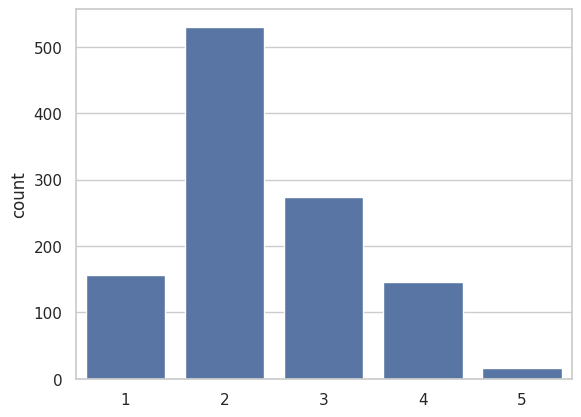

In [ ]:
caminos = []
for i in l.keys():
    for j in l[i].keys():
        if l[i][j] != 0:
            caminos.append(l[i][j])

sns.countplot(x=caminos)

print(f"El camino geodésico medio es: {nx.average_shortest_path_length(karate):.2f}")

## Componentes

Si cada par de vértices está conectado por algún camino, la red está **conectada**. Si hay algún par de vértices entre los que no existe ningún camino, se dice que el grafo está **desconectado**, es decir, que está formado por más de una **componente**.

En un grafo no dirigido, el conjunto de vértices alcanzables desde un vértice se llama componente (y, para cada vértice $j$ alcanzable desde $i$, $i$ también es alcanzable desde $j$). En un grafo dirigido, la accesibilidad en una dirección no implica la accesibilidad en la otra, y la noción de "conectado" se vuelve más compleja. Un grupo de nodos que es alcanzable por pares sólo si ignoramos la dirección de las aristas es un **componente débilmente conectado**, mientras que un grupo de nodos que es alcanzable por pares si obedecemos las direcciones es un **componente fuertemente conectado**. Del mismo modo, un componente de salida es el conjunto de nodos a los que se puede llegar desde $i$, mientras que un componente de entrada es el conjunto de nodos que pueden llegar a $i$.

Muchas redes están formadas por múltiples componentes y, entre ellos, siempre hay un **componente más grande** (*largest component*), que suele ser el de mayor interés.

Desde **NetworkX** podemos obtener los distintos componentes de una red:

In [ ]:
list(nx.connected_components(karate))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

En esta ocasión todos los nodos pertenecen a la única componente de la red.

# EJERCICIO


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

!wget https://drive.upm.es/s/0aXFycZxgKTa9gt/download -O soc-FourSquare.mtx

G = nx.Graph()
with open('soc-FourSquare.mtx', 'r') as file:
    for line in file:
        if line.startswith('%'):
            continue
        parts = line.strip().split()
        if len(parts) == 3:
            i, j, weight = map(float, parts)
            G.add_edge(int(i), int(j), weight=weight)
        elif len(parts) == 2:
            i, j = map(int, parts)
            G.add_edge(i, j)


print(f"El grafo tiene {G.number_of_nodes()} nodos y {G.number_of_edges()} aristas")
